In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [40]:
data = pd.read_csv("processed_car_data.csv")

In [41]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [42]:
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company_name          int64
dtype: object

In [43]:
def random_null(data, column_list, percentage):
    """_summary_

    Args:
        data (_type_): _description_
        column_list (_type_): _description_
        percentage (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    df_copy = data.copy()  
    percentage = percentage / 100
    total_rows = df_copy.shape[0]
    
    for column_name in column_list:
        num_nulls = int(total_rows * percentage)
        null_indices = np.random.choice(df_copy.index, num_nulls, replace=False)
        
        if pd.api.types.is_integer_dtype(df_copy[column_name]):
            df_copy[column_name] = df_copy[column_name].astype("Int64")
        
        df_copy.loc[null_indices, column_name] = np.nan
        
    return df_copy

In [44]:
data_columns = list(data.columns)

In [45]:
data_columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'company_name']

In [78]:
data_with_null_values = random_null(data, data_columns, 10)

In [79]:
data_with_null_values.isnull().sum()

symboling           20
fueltype            20
aspiration          20
doornumber          20
carbody             20
drivewheel          20
enginelocation      20
wheelbase           20
carlength           20
carwidth            20
carheight           20
curbweight          20
enginetype          20
cylindernumber      20
enginesize          20
fuelsystem          20
boreratio           20
stroke              20
compressionratio    20
horsepower          20
peakrpm             20
citympg             20
highwaympg          20
price               20
company_name        20
dtype: int64

In [80]:
data_with_null_values

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,NaN,64.1,...,<NA>,3.47,2.68,9.0,111,<NA>,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,NaN,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,NaN,102,5500,24,30,13950.0,1
4,2,1,<NA>,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,<NA>,0,<NA>,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,21
202,<NA>,1,0,4,3,2,0,109.1,188.8,NaN,...,5,3.58,2.87,8.8,134,5500,<NA>,23,21485.0,21
203,-1,0,1,4,3,2,0,NaN,188.8,68.9,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,<NA>


In [81]:
data_with_null_values["fueltype"][204]

1

In [82]:
null_indices_dict = {
    column: data_with_null_values.index[data_with_null_values[column].isnull()].tolist()
    for column in data_with_null_values.columns
}

In [83]:
null_indices_dict

{'symboling': [13,
  14,
  19,
  21,
  24,
  26,
  44,
  45,
  105,
  106,
  111,
  133,
  148,
  149,
  164,
  170,
  177,
  191,
  193,
  202],
 'fueltype': [20,
  22,
  31,
  41,
  62,
  78,
  84,
  124,
  132,
  139,
  140,
  144,
  146,
  156,
  182,
  183,
  190,
  192,
  196,
  200],
 'aspiration': [4,
  37,
  71,
  77,
  78,
  80,
  81,
  82,
  91,
  101,
  105,
  107,
  114,
  129,
  144,
  151,
  159,
  163,
  180,
  187],
 'doornumber': [9,
  11,
  37,
  44,
  51,
  53,
  55,
  67,
  92,
  94,
  98,
  112,
  116,
  139,
  157,
  158,
  163,
  164,
  179,
  200],
 'carbody': [14,
  21,
  39,
  46,
  56,
  63,
  67,
  68,
  77,
  89,
  91,
  115,
  118,
  122,
  141,
  151,
  160,
  173,
  175,
  185],
 'drivewheel': [12,
  16,
  18,
  27,
  28,
  29,
  45,
  64,
  73,
  97,
  104,
  115,
  123,
  131,
  141,
  148,
  152,
  172,
  184,
  196],
 'enginelocation': [20,
  26,
  34,
  39,
  43,
  45,
  47,
  71,
  99,
  103,
  105,
  117,
  123,
  147,
  153,
  157,
  177,
  182,

In [84]:
discrete_columns = ["company_name","symboling", "fueltype" , "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

In [85]:
data_with_null_values.dtypes

symboling             Int64
fueltype              Int64
aspiration            Int64
doornumber            Int64
carbody               Int64
drivewheel            Int64
enginelocation        Int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            Int64
enginetype            Int64
cylindernumber        Int64
enginesize            Int64
fuelsystem            Int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            Int64
peakrpm               Int64
citympg               Int64
highwaympg            Int64
price               float64
company_name          Int64
dtype: object

In [86]:
continuos_columns = ["horsepower","peakrpm","citympg","highwaympg","enginesize","curbweight","wheelbase", "carlength", "carwidth", "carheight", "boreratio","stroke", "compressionratio","price" ]

In [ ]:
def iterative_Cleaning_discrete_values(data, null_place_df,columns_list, number_of_loops):
    """_summary_

    Args:
        data (_type_): _description_
        null_place_df (_type_): _description_
        columns_list (_type_): _description_
        number_of_loops (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    for i in range(1,number_of_loops+1):
        for column_name in columns_list:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
    
    return data          

In [87]:
def iterative_Cleaning_discrete_values(data, null_indices_dict, columns_list, number_of_loops):
    """
    Iteratively fills null values in discrete columns using RandomForestClassifier.

    Args:
        data (pd.DataFrame): The dataset containing missing values.
        null_indices_dict (dict): A dictionary where keys are column names and values are lists of indices with null values.
        columns_list (list): List of column names to clean.
        number_of_loops (int): Number of iterations to perform the cleaning.

    Returns:
        pd.DataFrame: The dataset with missing values filled.
    """
    for i in range(1, number_of_loops + 1):
        for column_name in columns_list:
            if column_name not in null_indices_dict:
                continue  
            
            null_indices = null_indices_dict[column_name]
            non_null_indices = data.index.difference(null_indices)
            
            data_without_null_values = data.loc[non_null_indices]
            data_with_null_values = data.loc[null_indices]
        
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
        
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns=[column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[null_indices, column_name] = predicted
    
    return data


In [88]:
sample = iterative_Cleaning_discrete_values(data_with_null_values, null_indices_dict,discrete_columns,5)

In [89]:
sample

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,NaN,64.1,...,5,3.47,2.68,9.0,111,<NA>,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,NaN,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,NaN,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,4,3,2,0,109.1,188.8,NaN,...,5,3.58,2.87,8.8,134,5500,<NA>,23,21485.0,21
203,-1,0,1,4,3,2,0,NaN,188.8,68.9,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,2


In [ ]:

def compare_filled_columns(original_data, filled_data, null_indices_dict, columns_to_compare):
    """
    Compare specified columns in the original and filled data, showing only filled indices.

    Args:
        original_data (pd.DataFrame): Original DataFrame before introducing nulls.
        filled_data (pd.DataFrame): DataFrame after filling nulls.
        null_indices_dict (dict): Dictionary containing indices of null values for each column.
        columns_to_compare (list): List of columns to focus on for the comparison.

    Returns:
        pd.DataFrame: A DataFrame showing index, column_name, original_value, and filled_value.
    """
    comparison_results = []

    for column in columns_to_compare:
        if column in null_indices_dict:  
            null_indices = null_indices_dict[column]
            for idx in null_indices:
                original_value = original_data.at[idx, column]
                filled_value = filled_data.at[idx, column]

                comparison_results.append({
                    'index': idx,
                    'column_name': column,
                    'original_value': original_value,
                    'filled_value': filled_value
                })

    comparison_df = pd.DataFrame(comparison_results)
    return comparison_df


In [29]:
compare = compare_filled_columns(data, sample, null_indices_dict, columns_to_compare=["symboling", "carwidth"])

In [30]:
compare

,index,column_name,original_value,filled_value
0,1,symboling,3.0,3.0
1,18,symboling,2.0,2.0
2,25,symboling,1.0,1.0
3,50,symboling,1.0,1.0
4,65,symboling,0.0,0.0
5,70,symboling,-1.0,0.0
6,80,symboling,3.0,3.0
7,87,symboling,1.0,1.0
8,88,symboling,-1.0,1.0
9,103,symboling,0.0,0.0


In [ ]:
def iterative_Cleaning_continous_value(data, null_place_df,columns_list, number_of_loops):
    """_summary_

    Args:
        data (_type_): _description_
        null_place_df (_type_): _description_
        columns_list (_type_): _description_
        number_of_loops (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    for i in range(1, number_of_loops +1):
        for column_name in columns_list:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = LinearRegression()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
    
    return data 

In [ ]:
data_with_null_values.isnull

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,98.804324,168.8,64.1,...,5,3.47,2.68,9.000000,111,5000,21,31,13495.0,0
1,3,1,0,2,0,2,0,88.600000,168.8,64.1,...,5,3.47,2.68,9.000000,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.500000,171.2,65.5,...,5,2.68,3.47,10.208216,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,0,99.800000,176.6,66.2,...,5,3.19,3.40,10.000000,102,5500,24,30,13950.0,1
4,2,1,0,4,3,1,0,99.400000,176.6,66.4,...,5,3.19,3.40,8.000000,115,5500,18,22,17450.0,1


In [21]:
def iterative_cleaning_continuos_value(data, null_indices_dict, columns_list, number_of_loops):
    """_summary_

    Args:
        data (pd.DataFrame): The dataset contains missing values
        null_indices_dict (dict): A Dictionary where keya are column names and values are list of indices with null values
        columns_list (list): List of column names to clean
        number_of_loops (int): Number of iterations to perform the cleaning
    """
    for i in range(1, number_of_loops + 1):
        for column_name in columns_list:
            if column_name not in null_indices_dict:
                continue
            
            null_indices = null_indices_dict[column_name]
            non_null_indices = data.index.difference(null_indices)
            
            data_without_null_values = data.loc[non_null_indices]
            data_with_null_values = data.loc[null_indices]
            
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns= [column_name])
            
            predicted = model.predict(x_test)
            
            data.loc[null_indices, column_name] = predicted
            
    return data

In [94]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

def iterative_cleaning_continuous_value(data, null_indices_dict, columns_list, number_of_loops):
    """
    Args:
        data (pd.DataFrame): The dataset contains missing values
        null_indices_dict (dict): A dictionary where keys are column names and values are lists of indices with null values
        columns_list (list): List of column names to clean
        number_of_loops (int): Number of iterations to perform the cleaning
    """
    # Ensure columns are numeric to avoid type mismatches
    for column_name in columns_list:
        if column_name in data.columns:
            data[column_name] = pd.to_numeric(data[column_name], errors='coerce')  # Convert invalid entries to NaN

    for i in range(1, number_of_loops + 1):
        for column_name in columns_list:
            if column_name not in null_indices_dict:
                continue
            
            null_indices = null_indices_dict[column_name]
            non_null_indices = data.index.difference(null_indices)
            
            data_without_null_values = data.loc[non_null_indices]
            data_with_null_values = data.loc[null_indices]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            # Handle NaN in predicted values by replacing them with 0 or another value
            predicted = np.nan_to_num(predicted, nan=0)  # Replace NaNs with 0 (or mean of column)
            
            # Ensure the predicted values match the dtype of the original column
            if pd.api.types.is_integer_dtype(data[column_name]):
                # Safely round predicted values to integers before casting
                predicted = pd.Series(predicted).round().astype('Int64')  # Use 'Int64' for nullable integer type
            else:
                predicted = pd.Series(predicted).astype(float)
            
            # Check the predicted values and column types
            print(f"{column_name} dtype: {data[column_name].dtype}")
            print(f"Predicted dtype: {predicted.dtype}")
            
            # Update the original data with the predicted values
            data.loc[null_indices, column_name] = predicted
            
    return data


In [73]:
sample

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,168.8,64.100000,...,5,3.47,2.68,9.000000,111,5000,21,27,9980.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.100000,...,5,3.47,2.68,9.000000,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.500000,...,5,2.68,3.47,9.000000,154,5000,19,26,16500.0,12
3,2,1,0,4,3,1,0,99.8,176.6,66.200000,...,5,3.19,3.29,10.000000,102,5500,24,31,13950.0,1
4,2,1,0,4,3,0,0,99.4,173.2,65.911351,...,5,3.19,3.40,8.000000,115,5500,18,31,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.1,188.8,68.900000,...,5,3.78,3.15,9.500000,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.1,173.2,68.800000,...,5,3.78,3.29,8.700000,160,5300,19,25,19045.0,21
202,-1,1,0,4,3,2,0,109.1,188.8,68.900000,...,5,3.58,2.87,10.199568,134,5500,18,23,21485.0,21
203,-1,0,1,4,3,2,0,109.1,188.8,65.911351,...,3,3.01,3.40,23.000000,106,4800,26,27,22470.0,2


In [67]:
sample.dtypes

symboling             Int64
fueltype              Int64
aspiration            Int64
doornumber            Int64
carbody               Int64
drivewheel            Int64
enginelocation        Int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            Int64
enginetype            Int64
cylindernumber        Int64
enginesize            Int64
fuelsystem            Int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            Int64
peakrpm               Int64
citympg               Int64
highwaympg            Int64
price               float64
company_name          Int64
dtype: object

In [96]:
sample_continuis =  iterative_cleaning_continuous_value(fill_data, null_indices_dict, continuos_columns, 5 )

horsepower dtype: Int64
Predicted dtype: Int64


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
data_traditional_cleaning = data_with_null_values

In [ ]:
categorical_columns = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 
    'fuelsystem', 'company_name'
]

for col in categorical_columns:
    data_traditional_cleaning[col].fillna(data_traditional_cleaning[col].mode()[0], inplace=True)

In [92]:
fill_data = fill_with_traditional_method(sample)

C:\Users\harme\AppData\Local\Temp\ipykernel_9140\4105099655.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(fill_value, inplace=True)
C:\Users\harme\AppData\Local\Temp\ipykernel_9140\4105099655.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [90]:
continuos_columns

['horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'enginesize',
 'curbweight',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

In [ ]:

def fill_with_traditional_method(data):
    # Mapping of columns and the method to use (mean or median)
    numerical_columns = {
        'wheelbase': 'mean', 'carlength': 'median', 'carwidth': 'mean',
        'carheight': 'median', 'curbweight': 'mean', 'enginesize': 'median',
        'boreratio': 'mean', 'stroke': 'median', 'compressionratio': 'mean',
        'horsepower': 'median', 'peakrpm': 'median', 'citympg': 'mean',
        'highwaympg': 'mean', 'price': 'median'
    }

    for col, method in numerical_columns.items():
        # Calculate fill value based on method
        if method == 'mean':
            fill_value = data[col].mean()
        elif method == 'median':
            fill_value = data[col].median()
    
        # Fill missing values in integer columns with rounded mean/median
        if pd.api.types.is_integer_dtype(data[col]):
            data[col].fillna(int(round(fill_value)), inplace=True)
        else:
            data[col].fillna(fill_value, inplace=True)
    
    # Return the modified DataFrame (even though `inplace=True` is used, it's a good practice to return it explicitly)
    return data


In [22]:
data_traditional_cleaning

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.600000,168.8,64.100000,...,5,3.470000,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,3,1,0,88.600000,168.8,64.100000,...,5,3.470000,2.68,9.0,111,5000,21,27,16500.0,19
2,1,1,0,2,3,2,0,98.809189,171.2,65.500000,...,5,2.680000,3.47,9.0,154,5200,19,26,16500.0,0
3,2,1,0,4,3,1,0,98.809189,176.6,66.200000,...,5,3.190000,3.40,10.0,102,5200,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.400000,176.6,65.922162,...,5,3.190000,3.29,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.318541,3.29,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.100000,188.8,68.800000,...,5,3.780000,3.15,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.580000,2.87,8.8,134,5500,18,23,21485.0,21
203,-1,0,1,4,3,2,0,109.100000,188.8,68.900000,...,3,3.318541,3.29,23.0,106,4800,26,27,22470.0,21


In [23]:
def overalliterative(data_columns_discrete, data_columns_continuos,number_of_loops, data, null_place_df):
    for i in range(1, number_of_loops +1):
        for column_name in data_columns_continuos:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = LinearRegression()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
            
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
            
    return data
        

In [ ]:
def overalliterativedataype(data_columns_discrete, data_columns_continuos, number_of_loops, data, null_place_df):
    for i in range(1, number_of_loops + 1):
        for column_name in data_columns_continuos:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = np.round(predicted).astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
        
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = predicted.astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
            
    return data

In [ ]:
def overalliterativedataypestorage(data_columns_discrete, data_columns_continuos, number_of_loops, data, null_place_df):
    iteration_dict = {col : [] for col in data_columns_continuos+data_columns_discrete}
    for i in range(1, number_of_loops + 1):
        for column_name in data_columns_continuos:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = np.round(predicted).astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
        
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = predicted.astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
            
        
            
    return data, iteration_dict

In [68]:
data_traditional_cleaning_missing = data_with_null_values

In [69]:
data_with_null_values.isnull().sum()

symboling           20
fueltype            20
aspiration          20
doornumber          20
carbody             20
drivewheel          20
enginelocation      20
wheelbase           20
carlength           20
carwidth            20
carheight           20
curbweight          20
enginetype          20
cylindernumber      20
enginesize          20
fuelsystem          20
boreratio           20
stroke              20
compressionratio    20
horsepower          20
peakrpm             20
citympg             20
highwaympg          20
price               20
company_name        20
dtype: int64

In [ ]:


numerical_columns = {
    'wheelbase': 'mean', 'carlength': 'median', 'carwidth': 'mean',
    'carheight': 'median', 'curbweight': 'mean', 'enginesize': 'median',
    'boreratio': 'mean', 'stroke': 'median', 'compressionratio': 'mean',
    'horsepower': 'median', 'peakrpm': 'median', 'citympg': 'mean',
    'highwaympg': 'mean', 'price': 'median'
}

for col, method in numerical_columns.items():
    if method == 'mean':
        fill_value = data_traditional_cleaning_missing[col].mean()
    elif method == 'median':
        fill_value = data_traditional_cleaning_missing[col].median()
    
    if pd.api.types.is_integer_dtype(data_traditional_cleaning_missing[col]):
        data_traditional_cleaning_missing[col].fillna(int(round(fill_value)), inplace=True)
    else:
        data_traditional_cleaning_missing[col].fillna(fill_value, inplace=True)


C:\Users\harme\AppData\Local\Temp\ipykernel_15636\1398586740.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_traditional_cleaning_missing[col].fillna(fill_value, inplace=True)
C:\Users\harme\AppData\Local\Temp\ipykernel_15636\1398586740.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [71]:
data_traditional_cleaning_missing.isnull().sum()

symboling           20
fueltype            20
aspiration          20
doornumber          20
carbody             20
drivewheel          20
enginelocation      20
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype          20
cylindernumber      20
enginesize           0
fuelsystem          20
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
company_name        20
dtype: int64

In [ ]:
def overalliterativedataypestorage_withm_withmissingvalues(data_columns_discrete, data_columns_continuos, number_of_loops, data, null_place_df):
    iteration_dict = {col : [] for col in data_columns_continuos+data_columns_discrete}
    for i in range(1, number_of_loops + 1):
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = predicted.astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
            
            
        for column_name in data_columns_continuos:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = np.round(predicted).astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
        
        
        
            
    return data, iteration_dict

In [86]:
final_data_missing, iteration_data_missing = overalliterativedataypestorage_withm_withmissingvalues(discrete_columns,continuos_columns, 5, data_traditional_cleaning, data_null_places )

In [ ]:
def overall_iterative_data_type_storage_with_m_with_missing_values(
    data_columns_discrete, data_columns_continuous, number_of_loops, data, null_place_df, pre_fill_values
):
    
    iteration_dict = {col: [] for col in data_columns_continuous + data_columns_discrete}

    for column_name in data_columns_discrete + data_columns_continuous:
        
        null_indices = null_place_df[column_name]
        pre_filled_values = pre_fill_values[column_name][null_indices]
        iteration_dict[column_name].append(pre_filled_values)  
    
    for i in range(1, number_of_loops + 1):
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = predicted.astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
            
        for column_name in data_columns_continuous:
            data_without_null_values = data[null_place_df[column_name] == False]
            data_with_null_values = data[null_place_df[column_name] == True]
            
            x_train = data_without_null_values.drop(columns=[column_name])
            y_train = data_without_null_values[column_name]
            
            model = LinearRegression()
            model.fit(x_train, y_train)
            
            x_test = data_with_null_values.drop(columns=[column_name])
            predicted = model.predict(x_test)
            
            iteration_dict[column_name].append(predicted)
            
            
            if pd.api.types.is_integer_dtype(data[column_name]):
                predicted = np.round(predicted).astype(int)
            data.loc[data_with_null_values.index, column_name] = predicted
        
    return data, iteration_dict


In [ ]:
def grphical_cleaning_process(orginal_data, iterative_data,null_space_data, iterations, column):
    fig, axes = plt.subplots(nrows= iterations, ncols= 1, figsize = (10, 6* iterations))
    
    line_colors = plt.cm.viridis(np.linspace(0,1,iterations))
    
    for i, (iterativeData, color) in enumerate(zip(iterative_data, line_colors)):
        
        ax = axes[i] if iterations > 1 else axes
        
        ax.plot(null_space_data, orginal_data)
    
    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

original_data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
iterative_dict = {
    'A': [2.5, 3.5],  
    'B': [25, 35]     
}
null_indices_dict = {
    'A': [1, 3],     
    'B': [2, 3]      
}

def plot_iteration_graph(column_name, original_data, iterative_dict, null_indices_dict):
    null_indices = null_indices_dict[column_name]  
    iterative_values = iterative_dict[column_name]  

    if len(null_indices) != len(iterative_values):
        print(f"Mismatch: {len(iterative_values)} iterative values but {len(null_indices)} null indices.")
        return

    original_null_values = [original_data[column_name][idx] for idx in null_indices]

    plt.figure(figsize=(8, 6))

    plt.scatter(null_indices, original_null_values, color='black', label='Original Data (Null Values)', s=100)

    plt.scatter(null_indices, iterative_values, color='blue', label='Iterative Values', s=100)

    for idx, (original, iterative) in enumerate(zip(original_null_values, iterative_values)):
        plt.plot([null_indices[idx], null_indices[idx]], [original, iterative], 'r--', label='Correction' if idx == 0 else "")

    plt.title(f"Iterative Cleaning for Column '{column_name}'", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

plot_iteration_graph('A', original_data, iterative_dict, null_indices_dict)


In [ ]:
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company_name          int64
dtype: object

In [ ]:
for column_name in data_columns:
    if data[column_name].dtype == "int64":
        print(column_name ,data[column_name].unique())
        print("")

symboling [ 3  1  2  0 -1 -2]

fueltype [1 0]

aspiration [0 1]

doornumber [2 4]

carbody [0 2 3 4 1]

drivewheel [2 1 0]

enginelocation [0 1]

curbweight [2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975 2326 2480 2414 2458 2976 3016 3131 3151 2261 2209 2264
 2212 2319 2254 2221 2661 2563 2912 3034 2935 3042 3045 3157 2

In [73]:
discrete_columns = ["company_name","symboling", "fueltype" , "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

In [74]:
continuos_columns = ["horsepower","peakrpm","citympg","highwaympg","enginesize","curbweight","wheelbase", "carlength", "carwidth", "carheight", "boreratio","stroke", "compressionratio","price" ]

In [28]:
data_traditional_cleaning.dtypes

symboling             Int64
fueltype              Int64
aspiration            Int64
doornumber            Int64
carbody               Int64
drivewheel            Int64
enginelocation        Int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            Int64
enginetype            Int64
cylindernumber        Int64
enginesize            Int64
fuelsystem            Int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            Int64
peakrpm               Int64
citympg               Int64
highwaympg            Int64
price               float64
company_name          Int64
dtype: object

In [29]:
overalliterativedataype(discrete_columns, continuos_columns, 5, data_traditional_cleaning, data_null_places)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.600000,168.8,64.100000,...,5,3.470000,2.680000,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.600000,168.8,64.100000,...,5,3.470000,2.680000,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,95.754291,171.2,65.500000,...,5,2.680000,3.470000,9.0,154,5990,19,26,16500.0,0
3,2,1,0,4,3,1,0,97.744042,176.6,66.200000,...,5,3.190000,3.400000,10.0,102,5644,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.400000,176.6,67.195419,...,5,3.190000,3.145380,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.598612,3.310557,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.100000,188.8,68.800000,...,5,3.780000,3.150000,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.580000,2.870000,8.8,134,5500,18,23,21485.0,21
203,-1,0,1,4,3,2,0,109.100000,188.8,68.900000,...,3,3.634945,3.133195,23.0,106,4800,26,27,22470.0,21


In [30]:
final_data , iteration_data = overalliterativedataypestorage(discrete_columns, continuos_columns, 5, data_traditional_cleaning, data_null_places)

In [31]:
final_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.600000,168.8,64.100000,...,5,3.470000,2.680000,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.600000,168.8,64.100000,...,5,3.470000,2.680000,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,96.016770,171.2,65.500000,...,5,2.680000,3.470000,9.0,154,5947,19,26,16500.0,0
3,2,1,0,4,3,1,0,96.654556,176.6,66.200000,...,5,3.190000,3.400000,10.0,102,5809,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.400000,176.6,67.334821,...,5,3.190000,3.145899,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.609092,3.277513,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,4,3,2,0,109.100000,188.8,68.800000,...,5,3.780000,3.150000,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,4,3,2,0,109.100000,188.8,68.900000,...,5,3.580000,2.870000,8.8,134,5500,18,23,21485.0,21
203,-1,0,1,4,3,2,0,109.100000,188.8,68.900000,...,3,3.619991,3.034243,23.0,106,4800,26,27,22470.0,21


In [36]:
iteration_data['symboling']

[array([ 3.,  0.,  1.,  0.,  3.,  0., -1.,  1.,  3.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  2.,  2.,  2., -1.]),
 array([ 3.,  0.,  1.,  0.,  3.,  0., -1.,  1.,  3.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  2.,  2.,  2., -1.]),
 array([ 1.,  0.,  1.,  0.,  3.,  0., -1.,  1.,  3.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  2.,  2.,  2., -1.]),
 array([ 0.,  0.,  1.,  0.,  3.,  0., -1.,  1.,  3.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  2.,  2.,  2., -2.]),
 array([ 3.,  0.,  1.,  0.,  3.,  0., -1.,  1.,  3.,  0.,  1.,  2.,  0.,
         0.,  0.,  1.,  2.,  2.,  2., -1.])]

In [ ]:
def plot_iteration_graph(column_name, original_data, iterative_dict, null_indices_dict):
    null_indices = null_indices_dict[column_name]  
    iterative_values = iterative_dict[column_name]  

    if len(null_indices) != len(iterative_values):
        print(f"Mismatch: {len(iterative_values)} iterative values but {len(null_indices)} null indices.")
        return

    original_null_values = [original_data[column_name][idx] for idx in null_indices]

    plt.figure(figsize=(8, 6))

    plt.scatter(null_indices, original_null_values, color='black', label='Original Data (Null Values)', s=100)

    plt.scatter(null_indices, iterative_values, color='blue', label='Iterative Values', s=100)

    for idx, (original, iterative) in enumerate(zip(original_null_values, iterative_values)):
        plt.plot([null_indices[idx], null_indices[idx]], [original, iterative], 'r--', label='Correction' if idx == 0 else "")

    plt.title(f"Iterative Cleaning for Column '{column_name}'", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

In [ ]:
def plot_iteration_graph(column_name, original_data, iteration_data, null_indices_dict):
    """
    Plot the original null values and iterative values (with line graphs) for a specified column.

    Args:
        column_name (str): Name of the column to visualize.
        original_data (pd.DataFrame): Original dataset with all values.
        iteration_data (dict): Dictionary where keys are column names and values are lists of lists (iterations).
        null_indices_dict (dict): Dictionary where keys are column names and values are lists of null indices.
    """
    null_indices = null_indices_dict.get(column_name, [])
    if not null_indices:
        print(f"No null indices found for column '{column_name}'.")
        return
    
    original_null_values = [original_data[column_name][idx] for idx in null_indices]
    
    column_iteration_data = iteration_data.get(column_name, [])
    num_iterations = len(column_iteration_data)
    
    if num_iterations == 0:
        print(f"No iterative data available for column '{column_name}'.")
        return
    
    fig, ax = plt.subplots(figsize=(12, 8))
    x_positions = range(len(null_indices))  
    
    ax.scatter(
        x_positions, 
        original_null_values, 
        color='black', 
        label='Original Null Values (Points)', 
        s=100, 
        zorder=3
    )
    ax.plot(
        x_positions, 
        original_null_values, 
        color='black', 
        label='Original Null Values (Line)', 
        linewidth=2, 
        linestyle='-',
        zorder=3
    )
    
    colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  
    
    for i, iteration_values in enumerate(column_iteration_data):
        if len(iteration_values) != len(null_indices):
            print(f"Mismatch in iteration {i + 1}: {len(iteration_values)} values for {len(null_indices)} null indices.")
            continue
        
        ax.scatter(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Points)', 
            s=70, 
            zorder=2
        )
        
        ax.plot(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Line)', 
            linewidth=1.5, 
            linestyle='-',
            zorder=2
        )
        
        for idx, (orig_val, iter_val) in enumerate(zip(original_null_values, iteration_values)):
            ax.plot(
                [x_positions[idx], x_positions[idx]], 
                [orig_val, iter_val], 
                color=colors[i], 
                linestyle='--', 
                linewidth=1, 
                alpha=0.7,
                label='Correction' if idx == 0 and i == 0 else ""  
            )
    
    ax.set_title(f"Iterative Cleaning for Column '{column_name}'", fontsize=16)
    ax.set_xlabel("Null Index Position", fontsize=14)
    ax.set_ylabel("Value", fontsize=14)
    ax.legend(fontsize=12, loc='upper right')
    ax.grid(True)
    plt.xticks(x_positions, labels=null_indices, rotation=45)  
    plt.tight_layout()
    plt.show()

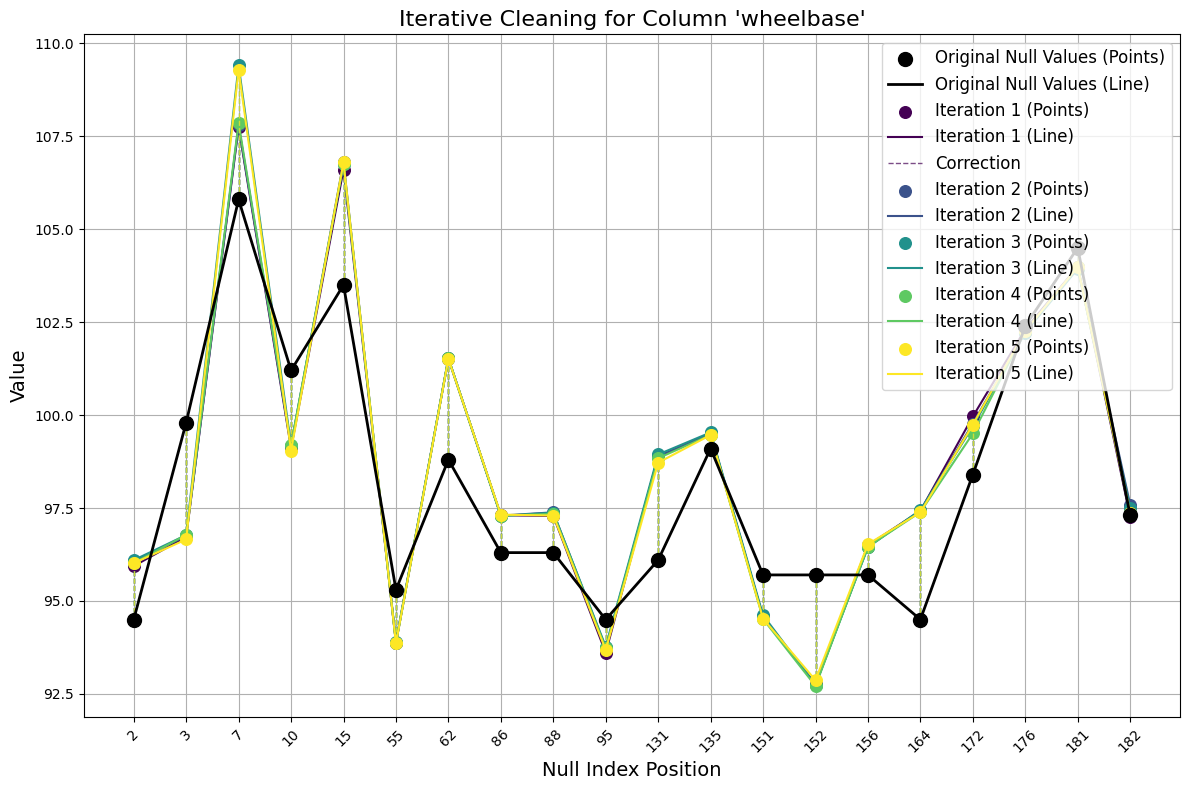

In [45]:
plot_iteration_graph("wheelbase", data, iteration_data, null_indices_dict)

In [ ]:
def plot_iteration_graph_per_iteration(column_name, original_data, iteration_data, null_indices_dict):
    """
    Plot original null values and iterative values for a specified column, with one graph per iteration.

    Args:
        column_name (str): Name of the column to visualize.
        original_data (pd.DataFrame): Original dataset with all values.
        iteration_data (dict): Dictionary where keys are column names and values are lists of lists (iterations).
        null_indices_dict (dict): Dictionary where keys are column names and values are lists of null indices.
    """
    null_indices = null_indices_dict.get(column_name, [])
    if not null_indices:
        print(f"No null indices found for column '{column_name}'.")
        return
    
    original_null_values = [original_data[column_name][idx] for idx in null_indices]
    
    column_iteration_data = iteration_data.get(column_name, [])
    num_iterations = len(column_iteration_data)
    
    if num_iterations == 0:
        print(f"No iterative data available for column '{column_name}'.")
        return
    
    colors = plt.cm.viridis(np.linspace(0, 1, num_iterations)) 
    
    for i, iteration_values in enumerate(column_iteration_data):
        if len(iteration_values) != len(null_indices):
            print(f"Mismatch in iteration {i + 1}: {len(iteration_values)} values for {len(null_indices)} null indices.")
            continue
        
        fig, ax = plt.subplots(figsize=(10, 6))
        x_positions = range(len(null_indices))  
        
        ax.scatter(
            x_positions, 
            original_null_values, 
            color='black', 
            label='Original Null Values (Points)', 
            s=100, 
            zorder=3
        )
        ax.plot(
            x_positions, 
            original_null_values, 
            color='black', 
            label='Original Null Values (Line)', 
            linewidth=2, 
            linestyle='-',
            zorder=3
        )
        
        ax.scatter(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Points)', 
            s=70, 
            zorder=2
        )
        ax.plot(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Line)', 
            linewidth=1.5, 
            linestyle='-',
            zorder=2
        )
        
        for idx, (orig_val, iter_val) in enumerate(zip(original_null_values, iteration_values)):
            ax.plot(
                [x_positions[idx], x_positions[idx]], 
                [orig_val, iter_val], 
                color=colors[i], 
                linestyle='--', 
                linewidth=1, 
                alpha=0.7,
                label='Correction' if idx == 0 else ""  
            )
        
        ax.set_title(f"Iterative Cleaning for Column '{column_name}' - Iteration {i + 1}", fontsize=16)
        ax.set_xlabel("Null Index Position", fontsize=14)
        ax.set_ylabel("Value", fontsize=14)
        ax.legend(fontsize=12, loc='upper right')
        ax.grid(True)
        plt.xticks(x_positions, labels=null_indices, rotation=45)  
        plt.tight_layout()
        plt.show()


In [47]:
iteration_data["wheelbase"]

[array([ 95.93622944,  96.72513378, 107.74760881,  99.10873737,
        106.60426483,  93.88005082, 101.52275268,  97.30427098,
         97.28743266,  93.60281518,  98.88960925,  99.47976236,
         94.55924413,  92.76353313,  96.49810381,  97.42155873,
         99.96249343, 102.31096108, 103.99452413,  97.2594927 ]),
 array([ 96.07393611,  96.74179969, 107.79352648,  99.17622858,
        106.81016792,  93.86690568, 101.51534368,  97.2962106 ,
         97.38389224,  93.73592235,  98.87070393,  99.51422224,
         94.5661187 ,  92.74439907,  96.46401292,  97.42117591,
         99.77145573, 102.23328322, 103.99262149,  97.59040167]),
 array([ 96.09747003,  96.77291379, 109.40833779,  99.17765949,
        106.7481803 ,  93.90430104, 101.52477187,  97.28738292,
         97.37651893,  93.77401519,  98.94026303,  99.53361094,
         94.61514246,  92.74492669,  96.44328293,  97.44592186,
         99.69288389, 102.22057002, 103.93697719,  97.49524297]),
 array([ 96.01915239,  96.77846363

In [ ]:
def plot_iteration_graph_per_iteration(column_name, original_data, iteration_data, null_indices_dict):
    """
    Plot original null values and iterative values for a specified column, with one graph per iteration,
    ensuring consistent scaling across all iterations.

    Args:
        column_name (str): Name of the column to visualize.
        original_data (pd.DataFrame): Original dataset with all values.
        iteration_data (dict): Dictionary where keys are column names and values are lists of lists (iterations).
        null_indices_dict (dict): Dictionary where keys are column names and values are lists of null indices.
    """
    null_indices = null_indices_dict.get(column_name, [])
    if not null_indices:
        print(f"No null indices found for column '{column_name}'.")
        return
    
    original_null_values = [original_data[column_name][idx] for idx in null_indices]
    
    column_iteration_data = iteration_data.get(column_name, [])
    num_iterations = len(column_iteration_data)
    
    if num_iterations == 0:
        print(f"No iterative data available for column '{column_name}'.")
        return
    
    all_values = original_null_values[:]
    for iteration_values in column_iteration_data:
        all_values.extend(iteration_values)
    y_min, y_max = min(all_values), max(all_values)
    
    colors = plt.cm.viridis(np.linspace(0, 1, num_iterations))  
    
    for i, iteration_values in enumerate(column_iteration_data):
        if len(iteration_values) != len(null_indices):
            print(f"Mismatch in iteration {i + 1}: {len(iteration_values)} values for {len(null_indices)} null indices.")
            continue
        
        fig, ax = plt.subplots(figsize=(10, 6))
        x_positions = range(len(null_indices)) 
        
        ax.scatter(
            x_positions, 
            original_null_values, 
            color='black', 
            label='Original Null Values (Points)', 
            s=100, 
            zorder=3
        )
        ax.plot(
            x_positions, 
            original_null_values, 
            color='black', 
            label='Original Null Values (Line)', 
            linewidth=2, 
            linestyle='-',
            zorder=3
        )
        
        ax.scatter(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Points)', 
            s=70, 
            zorder=2
        )
        ax.plot(
            x_positions, 
            iteration_values, 
            color=colors[i], 
            label=f'Iteration {i + 1} (Line)', 
            linewidth=1.5, 
            linestyle='-',
            zorder=2
        )
        
        for idx, (orig_val, iter_val) in enumerate(zip(original_null_values, iteration_values)):
            ax.plot(
                [x_positions[idx], x_positions[idx]], 
                [orig_val, iter_val], 
                color=colors[i], 
                linestyle='--', 
                linewidth=1, 
                alpha=0.7,
                label='Correction' if idx == 0 else ""  
            )
        
        ax.set_title(f"Iterative Cleaning for Column '{column_name}' - Iteration {i + 1}", fontsize=16)
        ax.set_xlabel("Null Index Position", fontsize=14)
        ax.set_ylabel("Value", fontsize=14)
        ax.set_ylim(y_min - 1, y_max + 1)  
        ax.legend(fontsize=12, loc='upper right')
        ax.grid(True)
        plt.xticks(x_positions, labels=null_indices, rotation=45)  
        plt.tight_layout()
        plt.show()


In [50]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company_name'],
      dtype='object')

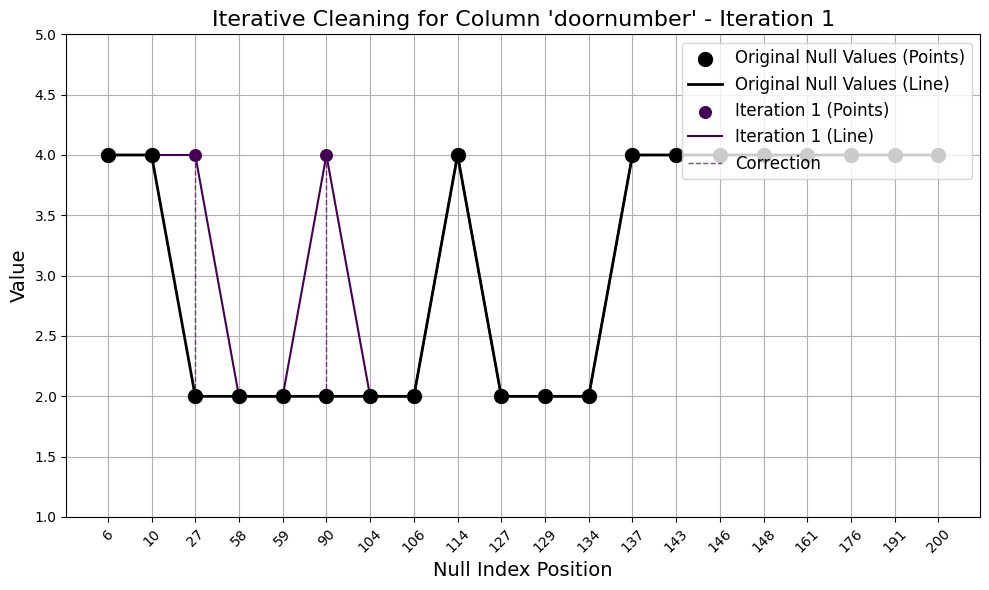

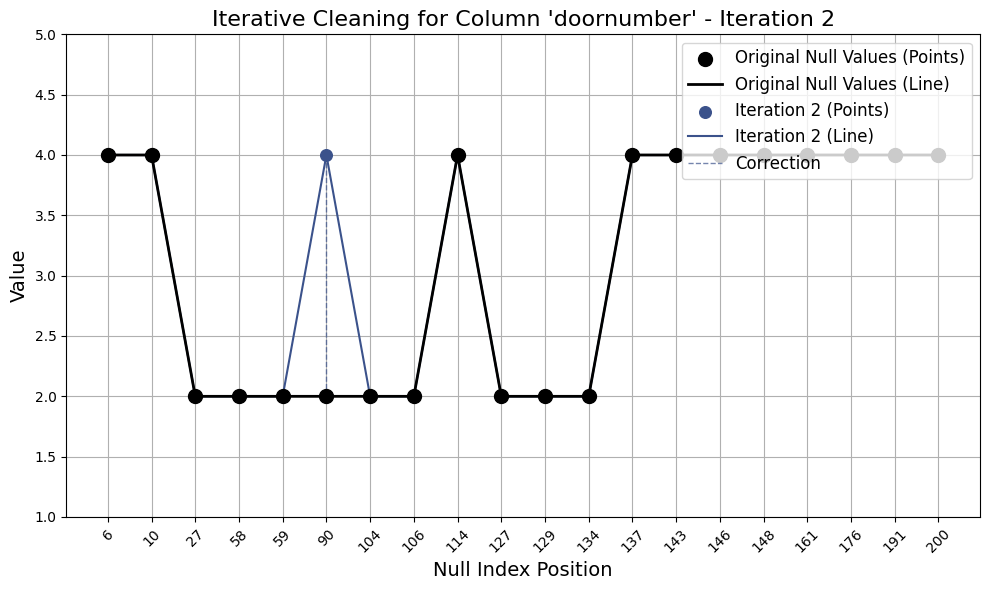

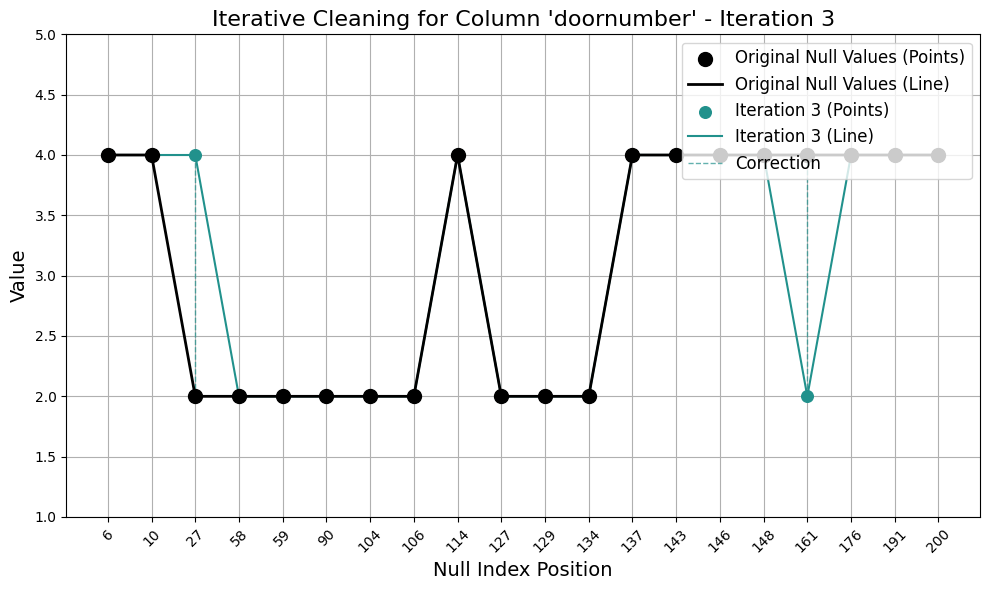

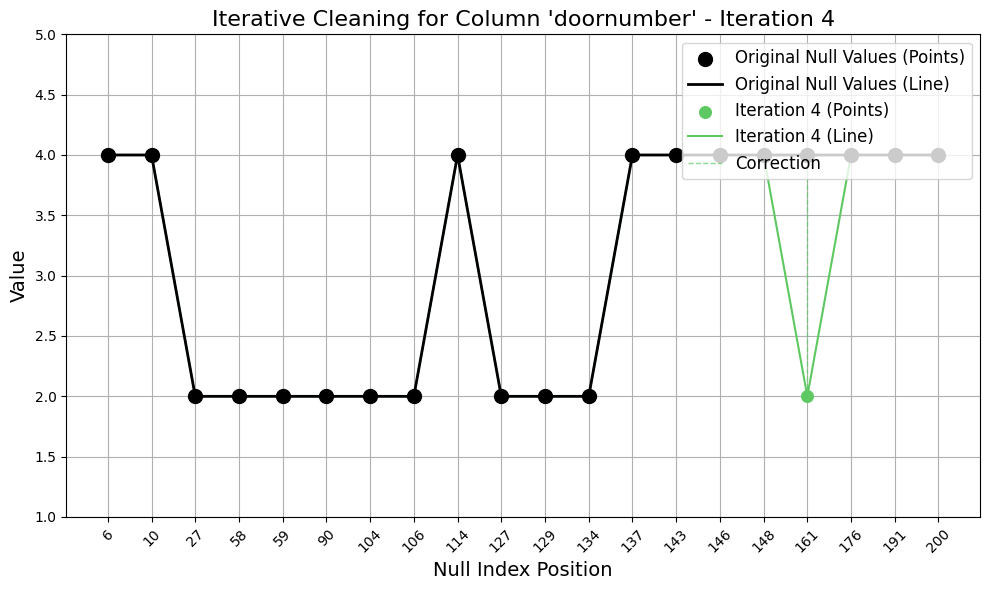

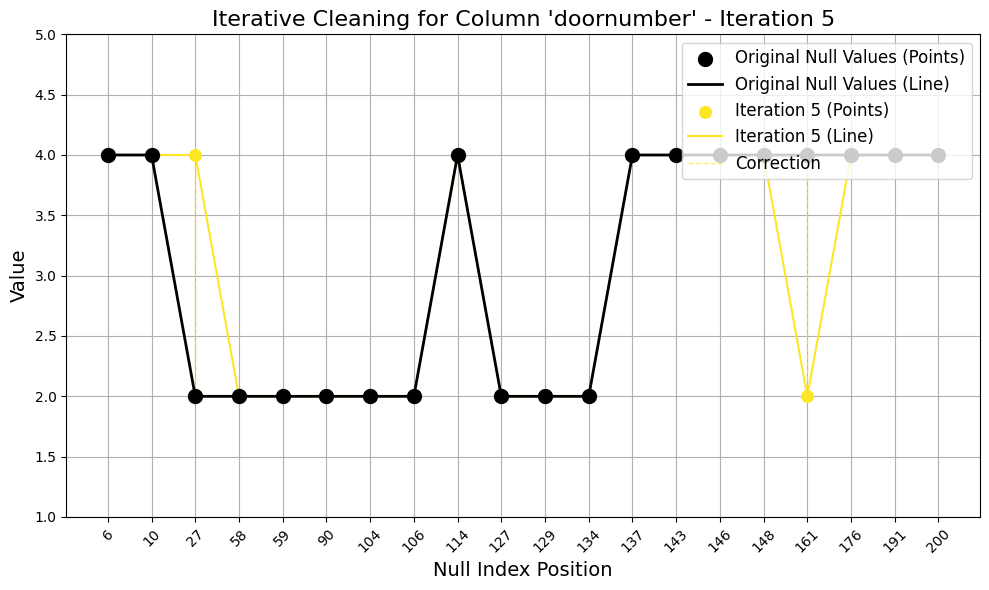

In [87]:
plot_iteration_graph_per_iteration("doornumber", data, iteration_data, null_indices_dict)

In [ ]:
filled_indices = null_indices[:len(null_indices_dict)]
null_indices_dict['A'] = null_indices[len(null_indices_dict):]


In [62]:
print("Null Indices:", null_indices)
print("Iterative Values:", iteration_data)
print("Length of Null Indices:", len(null_indices))
print("Length of Iterative Values:", len(iteration_data))


Null Indices: [  1   1   1   2   3   3   4   4   5   5   5   6   6   7   7   7   8   9
  10  10  11  11  11  11  11  12  12  13  13  14  14  16  16  17  17  18
  18  19  19  19  19  20  21  21  23  24  25  26  26  27  28  28  28  29
  29  29  29  30  30  30  31  31  31  31  32  32  32  33  33  33  34  34
  35  35  35  36  36  37  37  38  38  39  39  40  41  42  42  42  42  42
  43  43  43  44  45  45  45  45  45  46  46  47  47  47  48  48  49  51
  51  51  52  52  52  52  53  54  54  54  55  55  55  56  56  57  58  58
  59  59  59  59  60  60  60  61  61  61  63  64  64  65  65  65  66  66
  66  66  67  67  67  67  68  68  68  68  68  69  69  70  71  71  71  71
  72  72  72  73  74  74  75  75  77  77  78  78  78  78  79  79  79  80
  80  80  81  81  82  82  82  84  84  85  85  85  86  86  86  87  88  88
  88  89  90  91  91  91  91  91  91  93  93  93  94  94  94  95  95  96
  96  97  98  98  98  98  99  99  99  99 100 101 101 101 101 102 102 102
 102 103 103 103 104 104 104 105 105 

In [81]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company_name'],
      dtype='object')

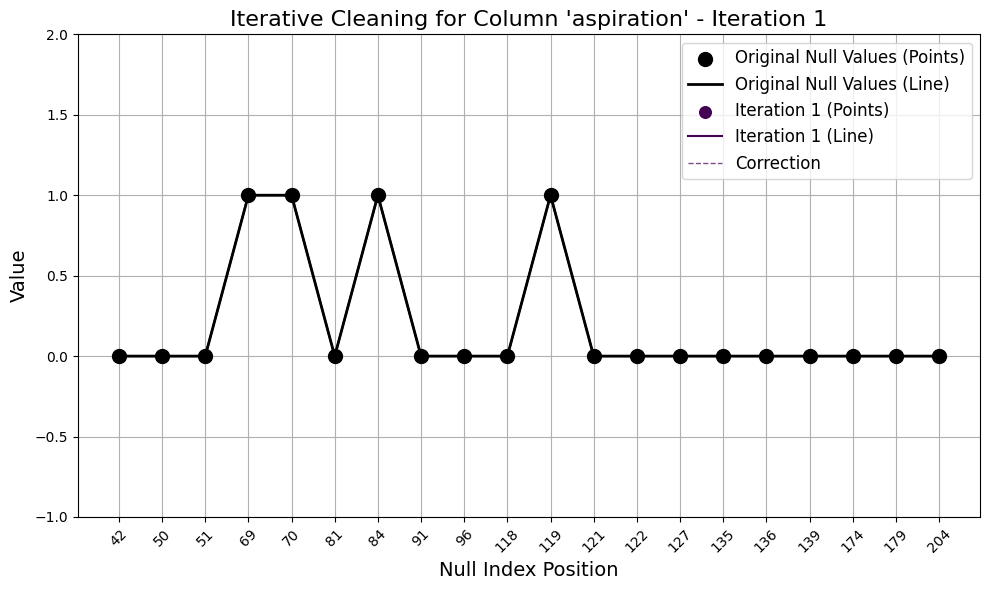

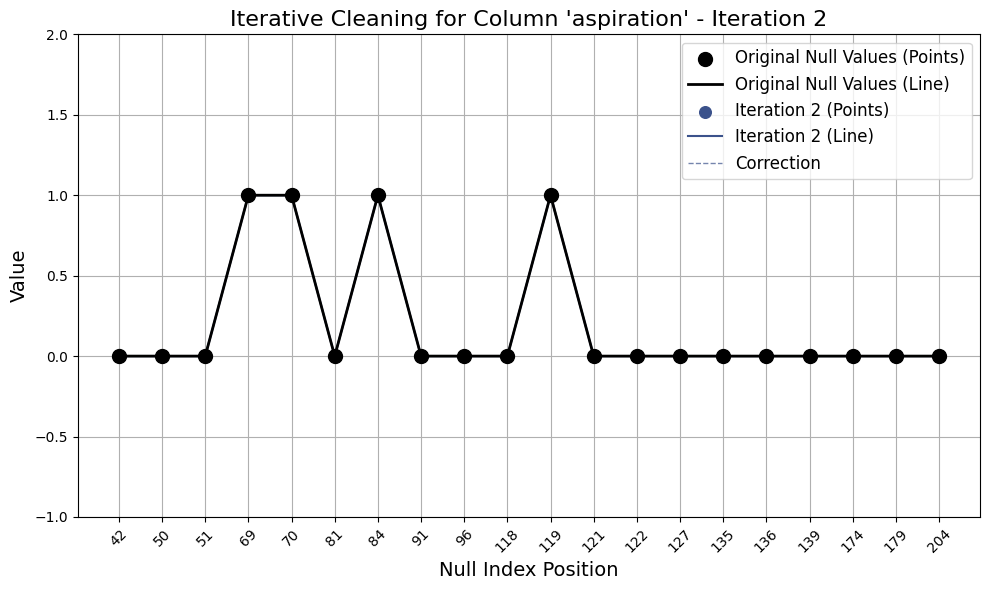

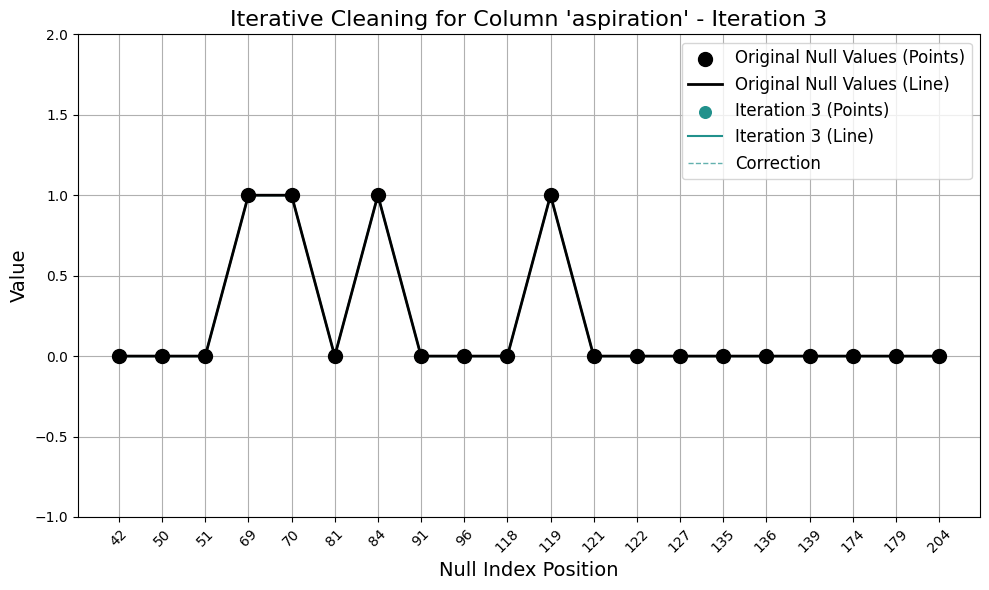

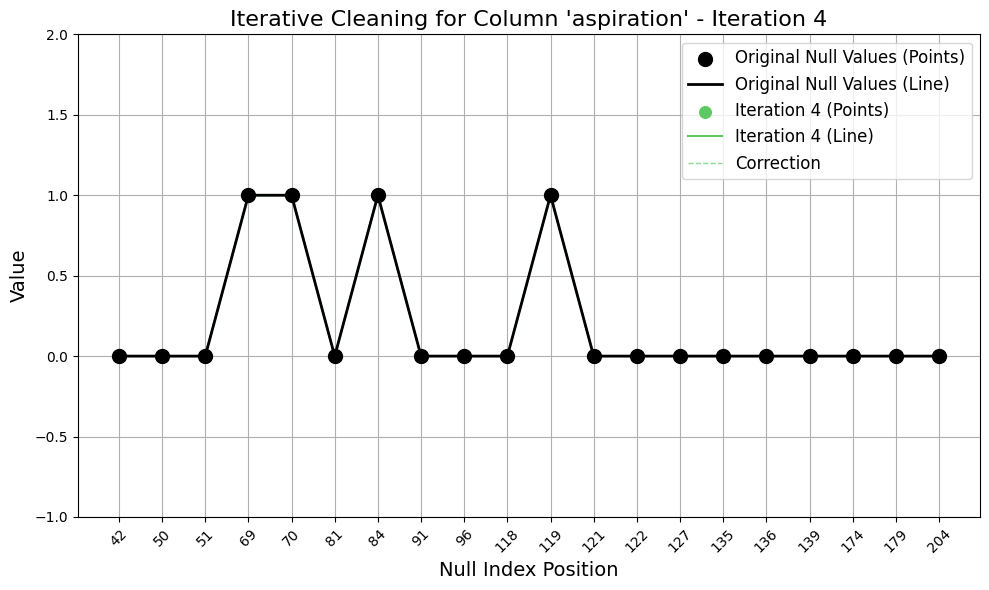

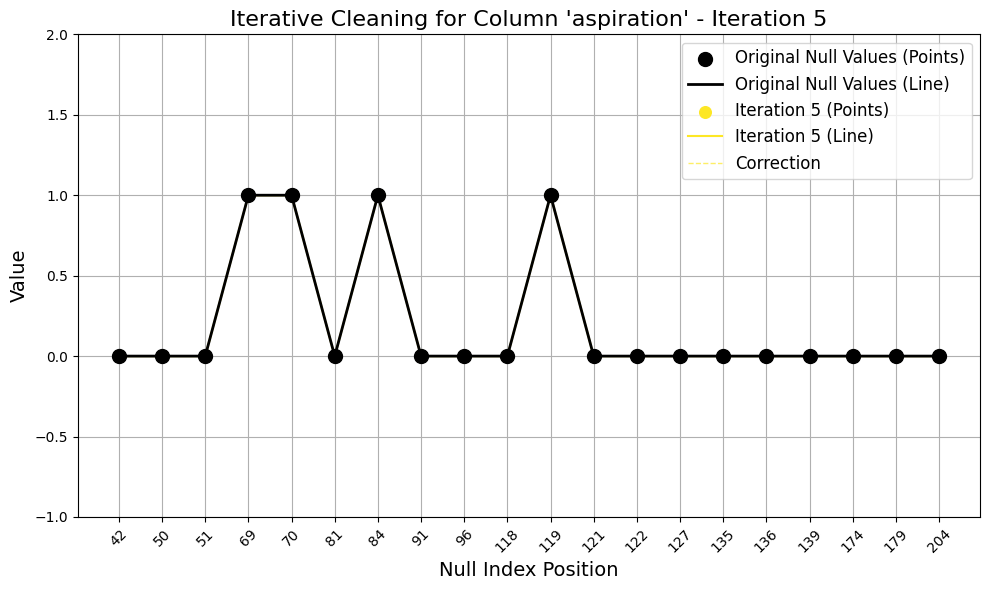

In [88]:
plot_iteration_graph_per_iteration("aspiration", data, iteration_data_missing, null_indices_dict)